In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#importing data
data=pd.read_csv(r'C:\Users\Nirmal\Dropbox\My PC (DESKTOP-0D4LU8O)\Desktop\Kaggle\creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
#checking for null values in the dataset
data.isnull().values.any()

False

We can see that there are no null values in the dataset.

### 'Class' Column

In [6]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

We can see that Class column contains 0s and 1s.


0 indicates normal activity while 1 indicates a Fraud.

#### Visualization for fraud vs normal 

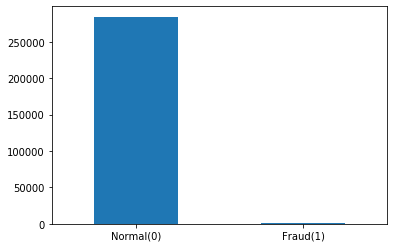

In [14]:
count=pd.value_counts(data['Class'],sort=True)
count.plot(kind='bar',rot=0)
plt.xticks(range(2),['Normal(0)','Fraud(1)'])
plt.xlabel=("class")
plt.ylabel=('frequency')
plt.title=('Class Distribution')

In [9]:
normal=data[data['Class']==0] #creating subset containing normal cases
fraud=data[data['Class']==1] #creating subset containing fraudulent cases

In [10]:
# Let's see the average withdrawn in normal case

print('normal_amount_avg',normal.Amount.mean())
print('fraudulent_amount_avg',fraud.Amount.mean())


normal_amount_avg 88.29102242225574
fraudulent_amount_avg 122.21132113821133


#### Visualization for amounts withdrawn in each case

In [12]:
normal.Amount.describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

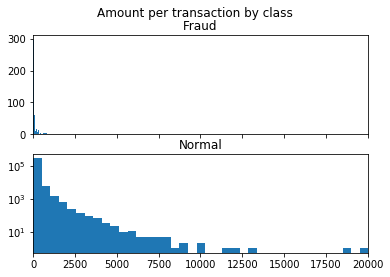

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hst(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [17]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

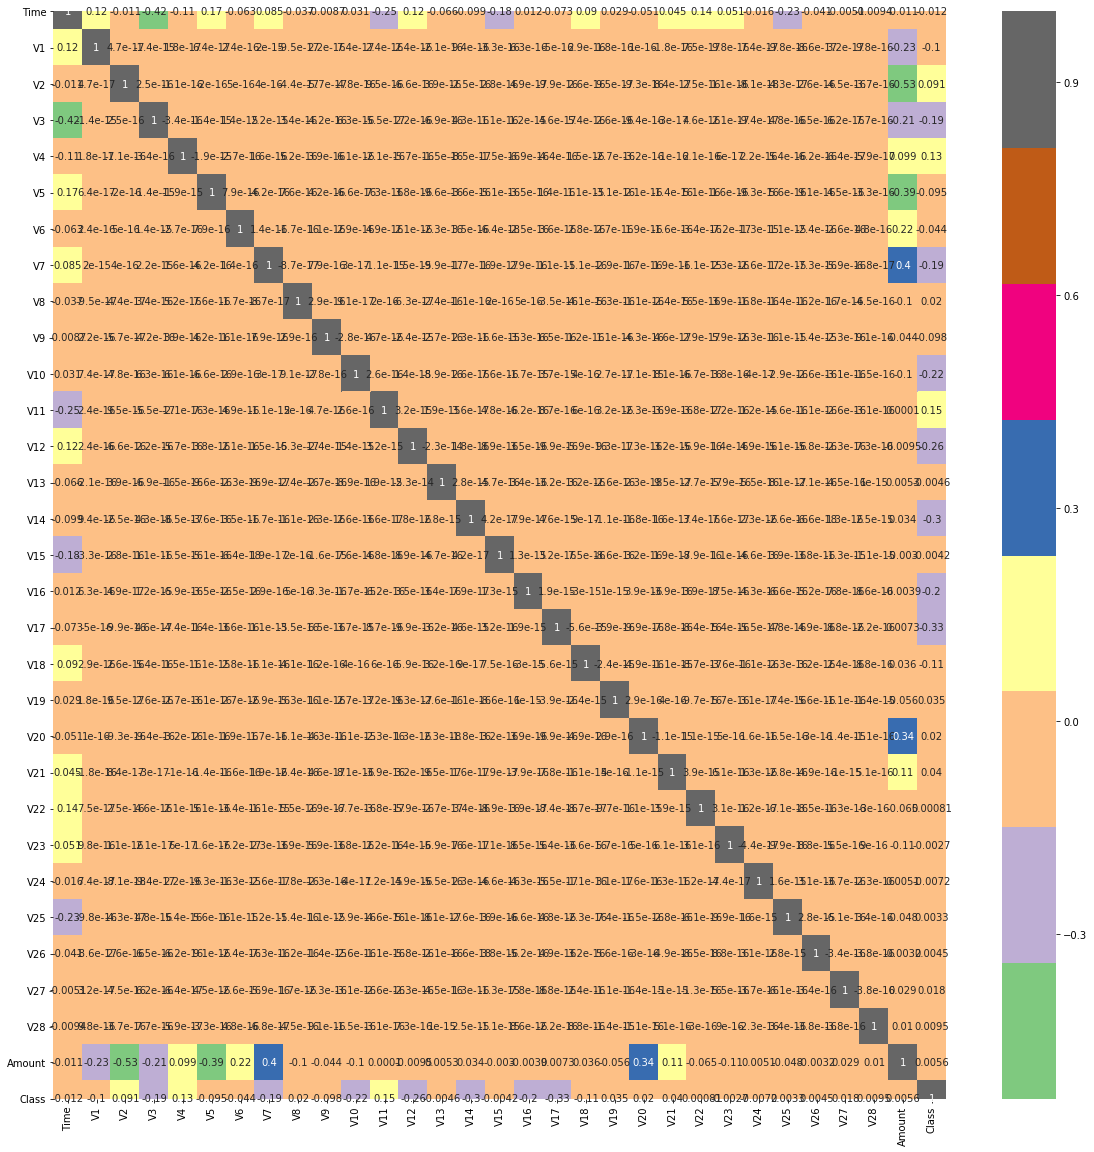

In [18]:
## Correlation
import seaborn as sns
cormatrix=data.corr()
cor_features=cormatrix.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[cor_features].corr(),annot=True,cmap="Accent")